<a href="https://colab.research.google.com/github/raghavendrakulkarni14/Netflix_clustering/blob/main/RaghavendraAKulkarniNETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [93]:
#importing required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [94]:
#mounting the drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#reading the dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter_Cap-4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [96]:
#Lookin at the information of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [97]:
#Splitting the listed_in column using ',' as delimiter
ll=list(df.listed_in)
list_of_listed_in=[]
for i in range(0,7787):
  list_of_listed_in.append(ll[i].split(','))


In [98]:
#removing the nested list to process the data correctly
output=[]
def reemovNestings(l):
   
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
reemovNestings(list_of_listed_in)


In [99]:
#removing the whitespaces from the list
o=[]
for z in output:
  o.append(z.strip())

In [100]:
#getting the word count of listed_in
listed_in_count = {}

for i in o:
  if i in listed_in_count.keys():
    listed_in_count[i] += 1
  else:
    listed_in_count[i] = 1

In [101]:
listed_in_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 148,
 'British TV Shows': 232,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 27,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 427,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 353,
 'Dramas': 2106,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1199,
 "Kids' TV": 414,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 56,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 147,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 150,
 'TV Comedies': 525,
 'TV Dramas': 704,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 76,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [102]:
#making the word count dictionary as dataframe to visualize the data
listed_in_df=pd.DataFrame(listed_in_count.items(), columns=['Categories', 'Count'])
listed_in_df.set_index('Categories')
listed_in_df.head(7)

,Categories,Count
0,International TV Shows,1199
1,TV Dramas,704
2,TV Sci-Fi & Fantasy,76
3,Dramas,2106
4,International Movies,2437
5,Horror Movies,312
6,Action & Adventure,721


Text(0.5, 1.0, 'Top 10 genre ')

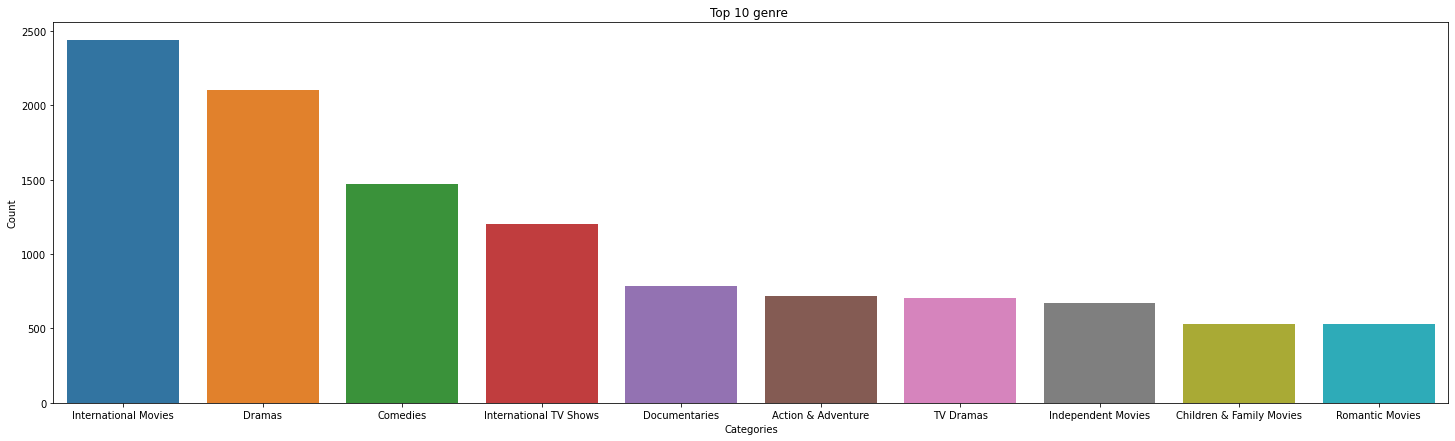

In [103]:
#bar graph for top 10 genre
ld=listed_in_df.sort_values(by='Count',ascending=False)[0:10].reset_index()
plt.figure(figsize=(25,7))
sns.barplot(x="Categories", y="Count", data=ld)
plt.title('Top 10 genre ')

Text(0.5, 1.0, 'Count of TV shows & MOvies')

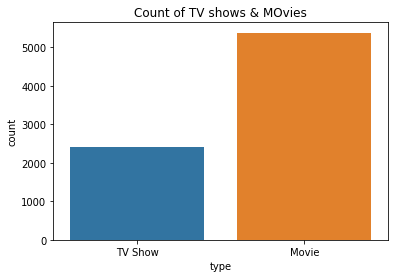

In [104]:
sns.countplot(x='type',data=df)
plt.title('Count of TV shows & MOvies')

In [105]:
#handling the null values 
df['country'].fillna(value='No Country',inplace=True)

In [106]:
#splitting the country column using ',' as delimiter
lc=list(df.country)
list_of_country=[]
for i in range(0,7787):
  list_of_country.append(lc[i].split(','))
  #print(lc[i])

In [107]:
#removing the nested list
output1=[]
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output1.append(i)

reemovNestings(list_of_country)


In [108]:
#removing the whitespace
o1=[]
for x in output1:
  o1.append(x.strip())

In [109]:
#getting the country count from country column
list_of_country_count = {}

for i in o1:
  if i in list_of_country_count.keys():
    list_of_country_count[i] += 1
  else:
    list_of_country_count[i] = 1

In [110]:
#converting the count dictionary to dataframe for visualization
listed_in_df1=pd.DataFrame(list_of_country_count.items(), columns=['Country', 'Count'])
listed_in_df1.set_index('Country')
listed_in_df1.head(4)

,Country,Count
0,Brazil,88
1,Mexico,154
2,Singapore,39
3,United States,3297


Text(0.5, 1.0, 'Top 10 Countries with most number of movies/Tv shows produced')

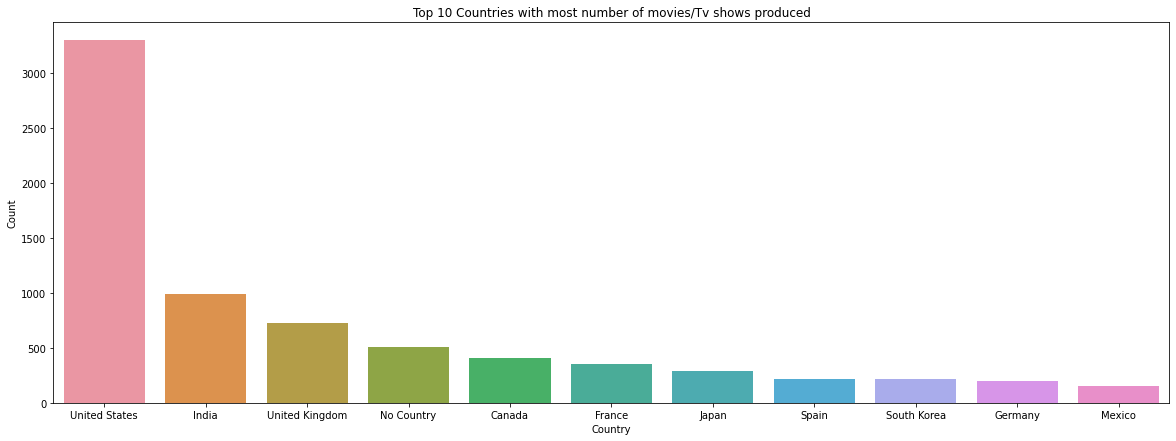

In [111]:
#bar graph of top 10 countries
ld1=listed_in_df1.sort_values(by='Count',ascending=False)[:11].reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="Country", y="Count", data=ld1)
plt.title('Top 10 Countries with most number of movies/Tv shows produced')

In [112]:
#import datetime library to extract the year and month from date_added column
import datetime as dt
df['date_added'] = pd.to_datetime(df['date_added'])
df['Year_added'] = df['date_added'].dt.year
df['Month_added']=df['date_added'].dt.month



In [113]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0


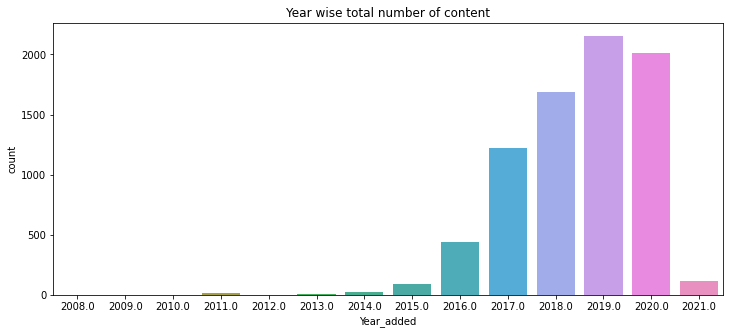

In [114]:
#bar graph of yearwise count of shows
plt.figure(figsize=(12,5))
plt.title('Year wise total number of content')
sns.countplot(x='Year_added',data=df)

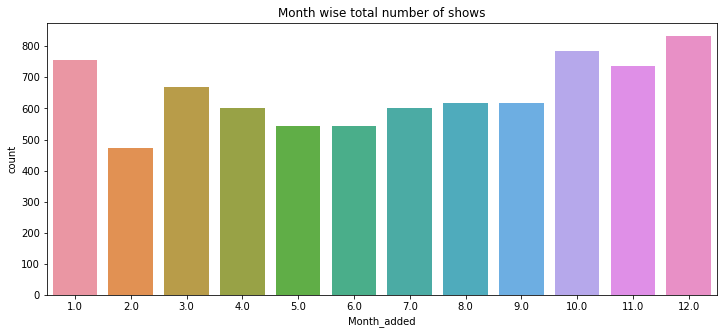

In [115]:
#bar graph of month wise count of shows
plt.figure(figsize=(12,5))
plt.title('Month wise total number of shows')
sns.countplot(x='Month_added',data=df)

In [116]:
# making  a copy of cast column and splitting using ',' as delimiter
casts = ", ".join(df.copy().fillna("")['cast']).split(", ")

In [117]:
#getting the cast count dictionary
list_of_casts= {}

for i in casts:
  if i in list_of_casts.keys():
    list_of_casts[i] += 1
  else:
    list_of_casts[i] = 1

In [118]:
#converting the count dictionary to dataframe for viz
listed_in_df2=pd.DataFrame(list_of_casts.items(), columns=['Cast_Name', 'Count'])
listed_in_df2.set_index('Cast_Name').head(3)

,Count
Cast_Name,
João Miguel,1
Bianca Comparato,2
Michel Gomes,1


Text(0.5, 1.0, 'Top 10 Cast Name with most number of movies/shows produced')

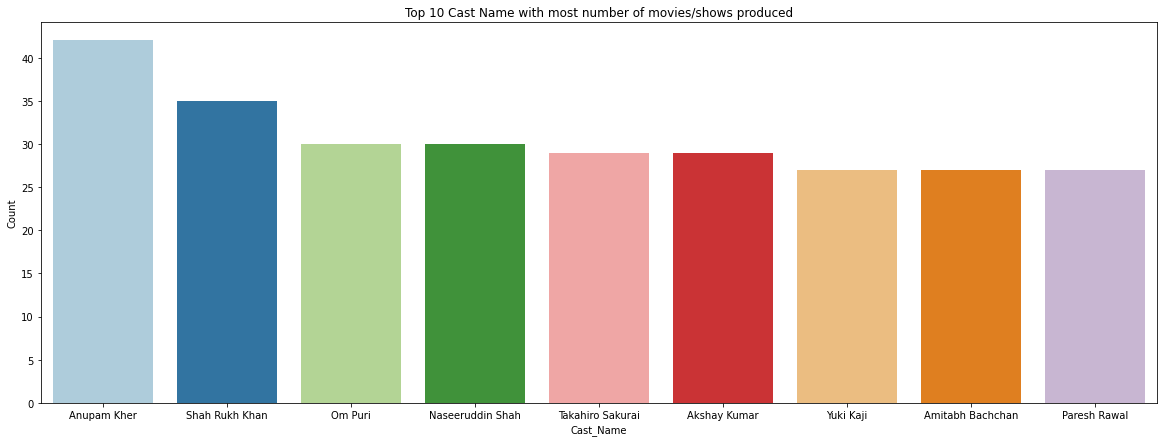

In [119]:
#bar graph of top 10 actors
ld2=listed_in_df2.sort_values(by='Count',ascending=False)[1:10].reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="Cast_Name", y="Count", data=ld2,palette="Paired")
plt.title('Top 10 Cast Name with most number of movies/shows produced')

In [120]:
#extracting most popular director
most_common_directors = df.director.value_counts().head(5).sort_values(ascending=False)

Text(0, 0.5, 'Count')

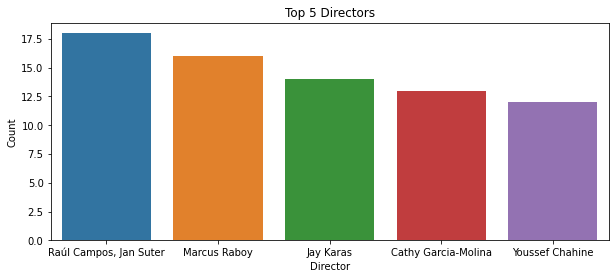

In [121]:
#bar graph of top 5 directors
md=most_common_directors.reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='index',y='director',data=md)
plt.title('Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Count')


In [122]:
# bifurcating the movies and tv shows from type column
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]


In [123]:
#getting the count of movies and tv shows
movies_counts = movie_rows.Year_added.value_counts()
tv_counts = tv_rows.Year_added.value_counts()


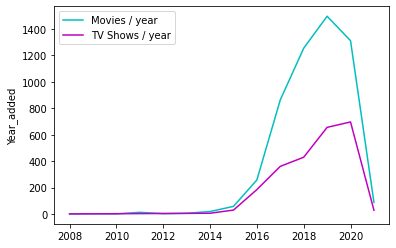

In [124]:
#line graph for movies and tv shows count
sns.lineplot(data=movies_counts, color="c",label="Movies / year")
sns.lineplot(data=tv_counts, color="m", label="TV Shows / year")

In [125]:
df.description

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [131]:
#importing the required libraries for nlp
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
#storing stopwords in an array
sw =stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [135]:
# function for removing punctuation and stopwords
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    corpus.append(review)



def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)


In [136]:
#removing punctuation
df['description'] = df['description'].apply(remove_punctuation)


In [137]:
#removing stopwords
df['description']=df['description'].apply(stopwords)

In [138]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2020.0,1.0


In [139]:
#Intializing the stemmer object
stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [140]:
#applyng stemmimg 
df['description'] = df['description'].apply(stemming)
df.description.head(10)

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
5    genet professor experi treatment comatos siste...
6    aw accid coupl admit grisli hospit separ must ...
7    one high school student attack dedic teacher t...
8    doctor goe miss psychiatrist wife treat bizarr...
9    architect wife move castl slate becom luxuri h...
Name: description, dtype: object

In [141]:
#function to get top words
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_description = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_description, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_description.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

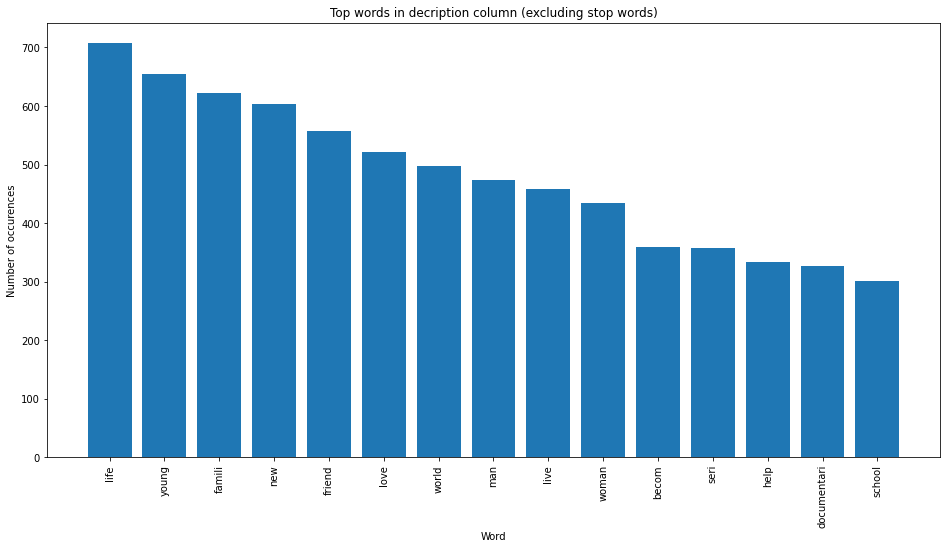

In [142]:
#initializing count vectorizer object
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df.description)

#bar graph of top 15 words
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in decription column (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [143]:
description_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
description_text =df.description

print('decription before vectorization: {}'.format(description_text[123]))

#getting the document term matrix
document_term_matrix = description_count_vectorizer.fit_transform(description_text)

print('description after vectorization: \n{}'.format(document_term_matrix[123]))

decription before vectorization: five friend embark mission climb highest peak java overcom obstacl way discov true mean friendship
description after vectorization: 
  (0, 1416)	1
  (0, 3709)	1
  (0, 1417)	1
  (0, 2464)	1
  (0, 3898)	1
  (0, 1099)	1
  (0, 2304)	1
  (0, 639)	1
  (0, 2594)	1
  (0, 2537)	1
  (0, 954)	1
  (0, 2224)	1


In [144]:
#import LatentDirichletAllocation for topic modelling
from sklearn.decomposition import LatentDirichletAllocation


In [145]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(6,10))}

# LDA model
lda = LatentDirichletAllocation(doc_topic_prior=0.5, topic_word_prior=0.5,max_iter=10, batch_size=1000,random_state=15)
lda_model = GridSearchCV(lda,param_grid=grid_params,cv=3)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more d

Best LDA model's params {'n_components': 6}
Best log likelihood Score for the LDA model -255134.8111934452
LDA model Perplexity on train data 2555.950221105523


In [146]:
!pip install pyLDAvis

In [147]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [148]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


In [149]:
#visualizing the clusters
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model,document_term_matrix,description_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  token_table['Freq'] = token_table['Freq'].round()
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5       1.465019 -47.625065       1        1  17.647614
0      54.854797 -36.476795       2        1  17.269900
4      32.212929 -61.444572       3        1  17.182691
1       5.111096 -14.110332       4        1  17.091244
3      26.350170 -33.374702       5        1  15.500477
2      38.109818  -7.222781       6        1  15.308075, topic_info=              Term        Freq       Total Category  logprob  loglift
3986         young  579.000000  579.000000  Default  30.0000  30.0000
3117        school  272.000000  272.000000  Default  29.0000  29.0000
1268        famili  549.000000  549.000000  Default  28.0000  28.0000
3952         woman  385.000000  385.000000  Default  27.0000  27.0000
3433         stori  265.000000  265.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
667         colleg   51.257085  107.451796   Topic6  -5.6010   1.1366
1538         group   59.940202  210.387787   Topic6  -5.4445   0.6212
3723          turn   57.931561  232.680673   Topic6  -5.4786   0.4864
2926  relationship   52.750138  139.080239   Topic6  -5.5723   0.9073
680       comedian   51.201156  126.575454   Topic6  -5.6021   0.9717

[380 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
46        2  0.056636     30
46        4  0.056636     30
46        5  0.849544     30
46        6  0.056636     30
48        1  0.062938     50
...     ...       ...    ...
3986      2  0.001726  young
3986      3  0.516064  young
3986      4  0.478093  young
3986      5  0.001726  young
3986      6  0.001726  young

[1552 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 5, 2, 4, 3])

# **Summary**
## 1.International Movies , Drama and Comedy are the top three genres

## 2. There is more movie content than TV shows content on Netflix .

## 3. United States , India and United Kingdom are the top three countries which produced most number of Movies / TV shows.

## 4. Netflix added highest content in the year 2019 followed by 2020 and 2018.

## 5. December , October and January are the peak months where the content got added on Netflix.

## 6. Anupam Kher , Shah Rukh Khan , Om Puri and Nazeeruddin Shah were the top actors on Netflix content.

## 7. Raul Campos, Jan Suter , Marcus Raboy and Jay Karas were the top directors.

## 8. Netflix is increasingly focusing on Movies in recent years.

## 9. Life , Young , Famili , New , Friend are the most common words in our corpus.

## 10. 6 clusters were generated after clustering ( Topic Modelling ).After analysing the top words in the clusters we were able to name them as
 

 ## Cluster --------- Name --------------Top words

 ## 1    ---   International Movies   ---(World,seri,special)

 ## 2    ---  Crime                  --- (new,help,power)  

## 3    ---  Drama                 ---(famili,young,life)

 ## 4    ---  Romantic             ---(woman.man,young)

 ## 5    ---  Documentary         ---(life,story,love)

 ## 6    ---  Childern & Family Movies---(school,friend,new)

#Best LDA model's params {'n_components': 6}
#Best log likelihood Score for the LDA model -255134.8111
#LDA model Perplexity on train data 2555.950221105523